<a href="https://colab.research.google.com/github/Isaac-Nilberto/desafio-fadesp-processo-seletivo/blob/master/prediction_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução e Metodologia

# Objetivos

## Importando base de dados e Bibliotecas

In [1]:
#Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importando base de dados
data = pd.read_csv("https://raw.githubusercontent.com/jralbbuquerque/desafio-fadesp-processo-seletivo/master/data/dataset_desafio_fadesp.csv", sep = ',', encoding = 'latin-1')


In [3]:
# fazendo uma copia do dado
data_work = data.copy()

## Análise de dados e processamento

### Análise em relação a categoria

In [4]:
# verificando o numero de linhas e colunas
data_work.shape

(51290, 24)

In [5]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [6]:
# visualizando os primeiros dados
# fazendo todas as 24 colunas
pd.options.display.max_columns = 30
data_work.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [7]:
#visualizando os ultimos dados
data_work.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,94533.0,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,Morocco,NaN,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,NaN,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,Mexico,NaN,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium
51289,36388,CA-2014-156720,31-12-2014,4/1/2015,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,United States,80538.0,US,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.17,Medium


In [8]:
# visualizando dados faltantes

data_work.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [9]:
# visualizando dados faltantes

data_work.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

Como Postal code tem muitos dados null faremos um drop.

In [10]:
data_work = data_work.drop('Postal Code', axis = 1)

Faz-se-á a verificação do tipo de dados

In [11]:
data_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Market          51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Product ID      51290 non-null  object 
 14  Category        51290 non-null  object 
 15  Sub-Category    51290 non-null  object 
 16  Product Name    51290 non-null  object 
 17  Sales           51290 non-null 

Como Order Date e Ship Date estão como objetos faremos a transformação para data

In [12]:
# convertendo as data object para data
data_work['Order Date'] = pd.to_datetime(data_work['Order Date'], format='%d/%m/%Y', errors= "coerce", dayfirst = False)
data_work['Ship Date'] = pd.to_datetime(data_work['Ship Date'], format='%d/%m/%Y', errors= "coerce", dayfirst = False)

# verificando se ocorreu a transformação dos dados
data_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      20067 non-null  datetime64[ns]
 3   Ship Date       19834 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Market          51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Product ID      51290 non-null  object        
 14  Category        51290 non-null  object        
 15  Su

In [13]:
# estatística descritiva completa
data_work.describe(include = 'all')

<ipython-input-13-aedfec90e58f>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_work.describe(include = 'all')
<ipython-input-13-aedfec90e58f>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_work.describe(include = 'all')


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
count,51290.00000,51290,20067,19834,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290
unique,NaN,25035,565,580,4,1590,795,3,3636,1094,147,7,13,10292,3,17,3788,NaN,NaN,NaN,NaN,NaN,4
top,NaN,CA-2014-100111,2014-09-03 00:00:00,2014-09-07 00:00:00,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,United States,APAC,Central,OFF-AR-10003651,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN,NaN,Medium
freq,NaN,14,126,115,30775,97,108,26518,915,2001,9994,11002,11117,35,31273,6152,227,NaN,NaN,NaN,NaN,NaN,29433
first,NaN,NaN,2011-01-01 00:00:00,2011-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2014-12-12 00:00:00,2015-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,25645.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.490581,3.476545,0.142908,28.610982,26.375915,NaN
std,14806.29199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,487.565361,2.278766,0.212280,174.340972,57.296804,NaN
min,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,0.000000,NaN
25%,12823.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.758625,2.000000,0.000000,0.000000,2.610000,NaN


In [14]:
# verificando Order date null e Ship date null
data_work[data_work['Order Date'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
20067,46321,EG-2011-4270,NaT,NaT,Standard Class,RD-9720,Roger Demir,Consumer,Aswan,Aswan,Egypt,Africa,Africa,OFF-SME-10004553,Office Supplies,Storage,"Smead Lockers, Blue",793.680,4,0.0,134.8800,76.60,Medium
20068,46319,EG-2011-4270,NaT,NaT,Standard Class,RD-9720,Roger Demir,Consumer,Aswan,Aswan,Egypt,Africa,Africa,TEC-HP -10001574,Technology,Copiers,"HP Fax Machine, Laser",1199.760,4,0.0,479.8800,55.62,Medium
20069,7097,MX-2011-150567,NaT,NaT,Standard Class,BW-11200,Ben Wallace,Consumer,Guzmán,Jalisco,Mexico,LATAM,North,TEC-MA-10000560,Technology,Machines,"StarTech Inkjet, Wireless",201.260,1,0.0,100.6200,31.78,High
20070,11476,IT-2011-5340302,NaT,NaT,Standard Class,GM-14680,Greg Matthias,Consumer,Dordrecht,South Holland,Netherlands,EU,Central,OFF-ST-10002506,Office Supplies,Storage,"Smead Lockers, Blue",198.420,2,0.5,-130.9800,14.53,Medium
20071,46320,EG-2011-4270,NaT,NaT,Standard Class,RD-9720,Roger Demir,Consumer,Aswan,Aswan,Egypt,Africa,Africa,OFF-FEL-10001343,Office Supplies,Storage,"Fellowes Box, Wire Frame",37.500,2,0.0,17.2200,2.66,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,NaT,2015-01-04,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,NaT,2015-01-05,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,Morocco,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,NaT,2015-01-02,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,NaT,2015-01-06,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,Mexico,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


In [15]:
# fazendo filtro para dados que não tenham nenhuma coluna nula ou apenas uma
data_work = data_work[
     (data_work['Order Date'].notnull() & data_work['Ship Date'].notnull()) |
     (data_work['Order Date'].notnull() & data_work['Ship Date'].isnull()) |
    (data_work['Order Date'].isnull() & data_work['Ship Date'].notnull())
                              ]

In [16]:
# verificando quantos Ship date são null
data_work['Ship Date'].isnull().sum()

6770

In [17]:
# verificando quantos Order date são null
data_work['Order Date'].isnull().sum()

6537

In [18]:
# verificando quantos Category são null
data_work['Category'].isnull().sum()

0

In [19]:
# verificando quantos Category são null
data_work['Category'].isna().sum()

0

Com base na data de entrega faremos a substituição dos dados faltantes de Order Date

In [20]:
# criando variavel para substituir orderdate = null
# criando variavel para substituir shipdate = null
# filtro_order fará o filtro de order date nulo e ship date não nulo o mesmo servira para ship date
filtro_order = (data_work['Order Date'].isnull()) & (data_work['Ship Date'].notnull())

# .loc ira localizar order date nulo e ship date nao nulo e a partir da data de entrega subtraira 20 dias
data_work.loc[filtro_order, 'Order Date'] = data_work.loc[filtro_order, 'Ship Date'] - pd.Timedelta(days=20)

# .loc ira localizar order date nao nulo e ship date  nulo e a partir da data de pedido adicionara 20 dias
filtro_ship = (data_work['Order Date'].notnull()) & (data_work['Ship Date'].isnull())

data_work.loc[filtro_ship, 'Ship Date'] = data_work.loc[filtro_ship, 'Order Date'] + pd.Timedelta(days=20)
# verificando se há null
print("Ship date null é igual a: ", data_work['Ship Date'].isnull().sum(),
      "Order date null é igual a: ", data_work['Ship Date'].isnull().sum())


Ship date null é igual a:  0 Order date null é igual a:  0


In [21]:
# verificando o shape
data_work.shape

(26604, 23)

In [22]:
# verificando os itens da categoria
data_work['Category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

Verificamos que temos três tipos de produtos


*   Office Supplies : Materiais de Escritório
*   Furniture : Móveis
*   Technology : Tecnologia





In [23]:
# verificando os sub-itens da categoria
data_work['Sub-Category'].unique()

array(['Storage', 'Supplies', 'Paper', 'Furnishings', 'Copiers',
       'Bookcases', 'Appliances', 'Art', 'Accessories', 'Binders',
       'Labels', 'Envelopes', 'Chairs', 'Machines', 'Tables', 'Phones',
       'Fasteners'], dtype=object)

In [24]:
# verificando os itens dentro de Product Name
data_work['Product Name'].unique()

array(['Tenex Lockers, Blue', 'Acme Trimmer, High Speed',
       'Tenex Box, Single Width', ...,
       'Bush Westfield Collection Bookcases, Fully Assembled',
       'Gear Head AU3700S Headset',
       'Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl'], dtype=object)

In [25]:
# verificando as formas de entrega
data_work['Ship Mode'].unique()

array(['Standard Class', 'Second Class', 'First Class', 'Same Day'],
      dtype=object)

É com base no ID que verificamos se há algum Item repetido por Ordem de serviço

In [26]:
# verificando se há id duplicado
data_work['Row ID'].duplicated().sum()

0

In [27]:
# criando uma nova variável que poderá servir de base para nosso Modelo de ML
# ela atribuira se foi rápido ou não a entrega
# ela pegara a diferenca entre a coluna Ship date Order Date
# caso a diferenca entre as colunas seja <= 5 sera atribuido fast
# caso >= 6 e <=20 normal
# caso qualquer outro caso slow
def calculate_delivery_speed(row):
    difference = (row['Ship Date'] - row['Order Date']).days
    if difference <= 5:
        return 'fast'
    elif difference >=6 and difference <=10:
      return 'normal'
    else:
        return 'slow'

# ela atribuira o dia da entrega
# ela pegara a diferenca entre a coluna Ship date Order Date
# etornando o dia

def day_of_delivery(row):
    difference = (row['Ship Date'] - row['Order Date']).days
    return difference

# ela atribuira o valor unitario
# valor divisao entre sales e quantidades

def price_unit(row):
    division = (row['Sales'] / row['Quantity'])
    return division


In [28]:
# criando nova coluna
data_work['Unit price'] = data_work.apply(price_unit, axis = 1)
data_work['Delivery speed'] = data_work.apply(calculate_delivery_speed, axis = 1)
data_work['Delivery Day'] = data_work.apply(day_of_delivery, axis = 1)

In [29]:
# verificando o dado
data_work

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit price,Delivery speed,Delivery Day
0,42433,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium,204.150,fast,5
1,22253,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium,40.122,normal,7
2,48883,HU-2011-1220,2011-01-01,2011-01-05,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High,16.530,fast,4
3,11731,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High,14.955,fast,4
4,22255,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium,22.734,normal,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,2014-12-15,2015-01-04,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium,6.952,slow,20
51286,47594,MO-2014-2560,2014-12-16,2015-01-05,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,Morocco,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium,3.990,slow,20
51287,8857,MX-2014-110527,2014-12-13,2015-01-02,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium,8.800,slow,20
51288,6852,MX-2014-114783,2014-12-17,2015-01-06,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,Mexico,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium,7.120,slow,20


Text(0.5, 1.0, 'Análise do Número da Rapidez de Entrega')

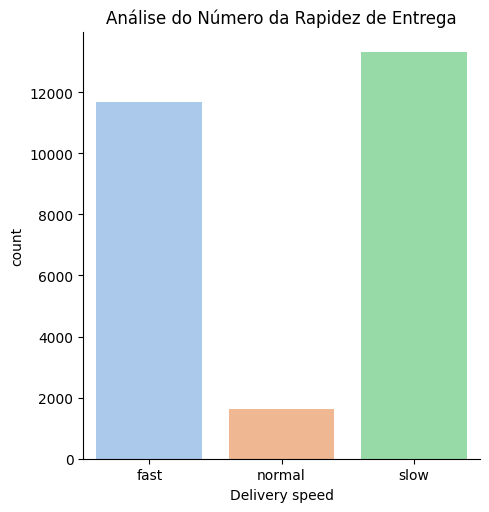

In [30]:
sns.catplot(data=data_work, x="Delivery speed", kind="count", palette = 'pastel')
plt.title('Análise do Número da Rapidez de Entrega')

Verificamos que temos muitos item entregues de forma rápida, abaixo de 5 dias, e muitos que tiveram sua entrega lenta.

Faremos um agrupamento da forma de Envio e Rapidez

In [31]:
entrega = data_work.groupby(['Ship Mode','Delivery speed'])['Delivery speed'].size().unstack('Delivery speed').fillna(0)
entrega

Delivery speed,fast,normal,slow
Ship Mode,,,
First Class,2470.0,0.0,1150.0
Same Day,1038.0,0.0,9.0
Second Class,2782.0,0.0,2081.0
Standard Class,5390.0,1617.0,10067.0


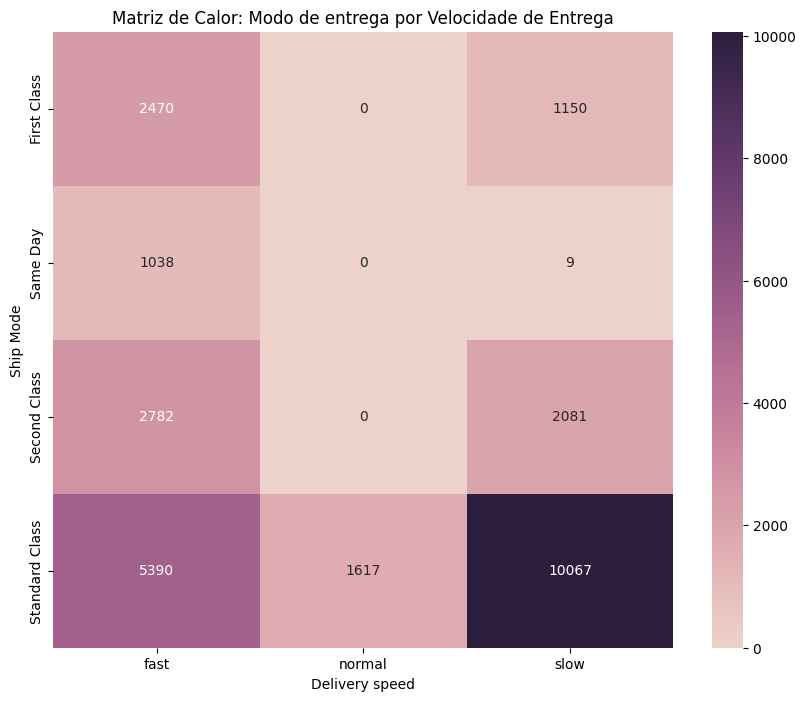

In [32]:
# Criando a matriz de calor
plt.figure(figsize=(10, 8))
sns.heatmap(entrega[['fast', 'normal', 'slow']],cmap=sns.cubehelix_palette(as_cmap=True), annot=True, fmt='g')

# Adicionando título
plt.title('Matriz de Calor: Modo de entrega por Velocidade de Entrega')

# Exibindo o gráfico
plt.show()

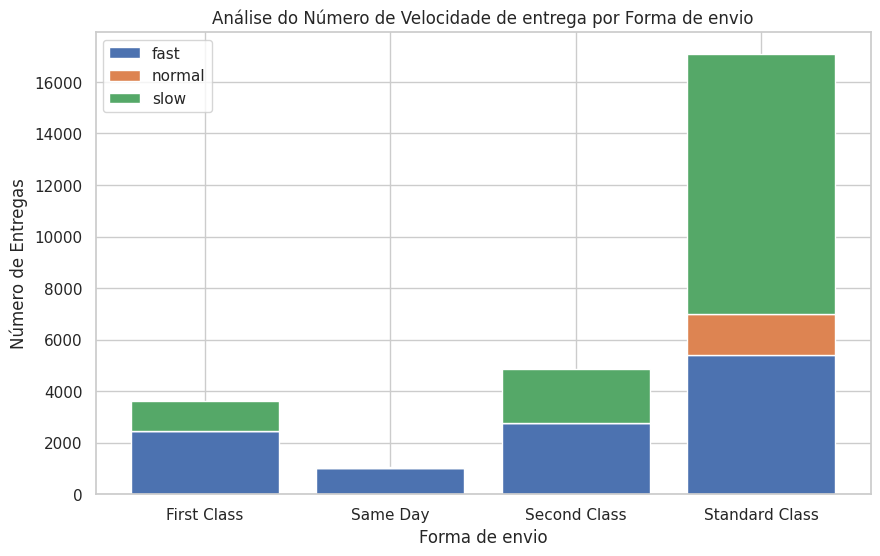

In [33]:
# Plotando um gráfico de barras empilhadas com Seaborn
entrega_fig = entrega.reindex(columns = ['First Class', 'Same Day', 'Second Class', 'Standard Class'])

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Definindo a posição da barra para a base (bottom)
bottom = [0] * len(entrega)

for column in entrega.columns:
    plt.bar(entrega.index, entrega[column], bottom=bottom, label=column)

    # Atualizando a posição da base (bottom) para a próxima barra
    bottom = [sum(x) for x in zip(bottom, entrega[column])]

# Adicionando título e rótulos
plt.title('Análise do Número de Velocidade de entrega por Forma de envio')
plt.xlabel('Forma de envio')
plt.ylabel('Número de Entregas')

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.show()


Notamos que tivemos de entregas rápidas:
* First class 2470;
* Same Day 1038;
* Second Class 2782;
* Standard class 5390;
* Total: 11680.

Nas entregas normais tivemos apenas entregas na forma Standard Class, 1617.

Por fim, tivemos entregas lentas:
* First class: 1150;
* Same day: 9;
* Second class: 2081;
* Standard class: 10067;
* Total: 13307.

Text(0.5, 1.0, 'Análise do Número de Quantidades Ventidas por Categoria')

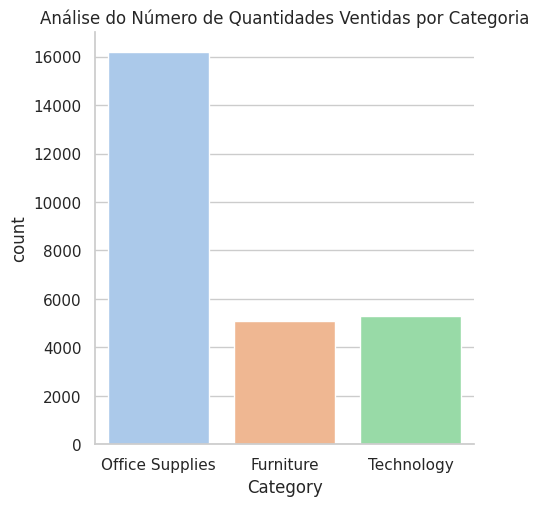

In [34]:
sns.catplot(data=data_work, x="Category", kind="count", palette = 'pastel')
plt.title('Análise do Número de Quantidades Ventidas por Categoria')

Faremos um agrupamento para sabermos a quantidade de itens vendidos por subcategoria


In [35]:
quantidade = data_work.groupby(['Category','Sub-Category'])['Category'].size().unstack('Category').fillna(0)

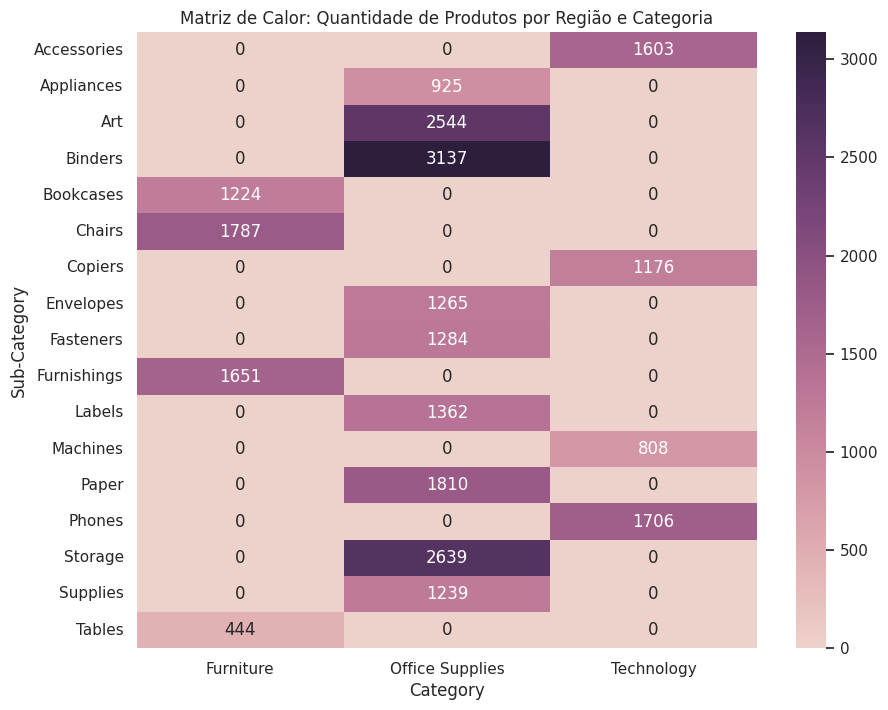

In [36]:
# Criando a matriz de calor
plt.figure(figsize=(10, 8))
sns.heatmap(quantidade[['Furniture', 'Office Supplies', 'Technology']],cmap=sns.cubehelix_palette(as_cmap=True), annot=True, fmt='g')

# Adicionando título
plt.title('Matriz de Calor: Quantidade de Produtos por Região e Categoria')

# Exibindo o gráfico
plt.show()

Podemos notar que temos como itens mais procurados Office spplies, seguido de technology e por fim vem o furniture. Agora faremos a análise por Categoria e Região:

In [37]:
quantidade_regiao = data_work.groupby(['Category','Region'])['Category'].size().unstack('Category').fillna(0)
quantidade_regiao.loc['Total'] = quantidade_regiao.sum(axis=0)

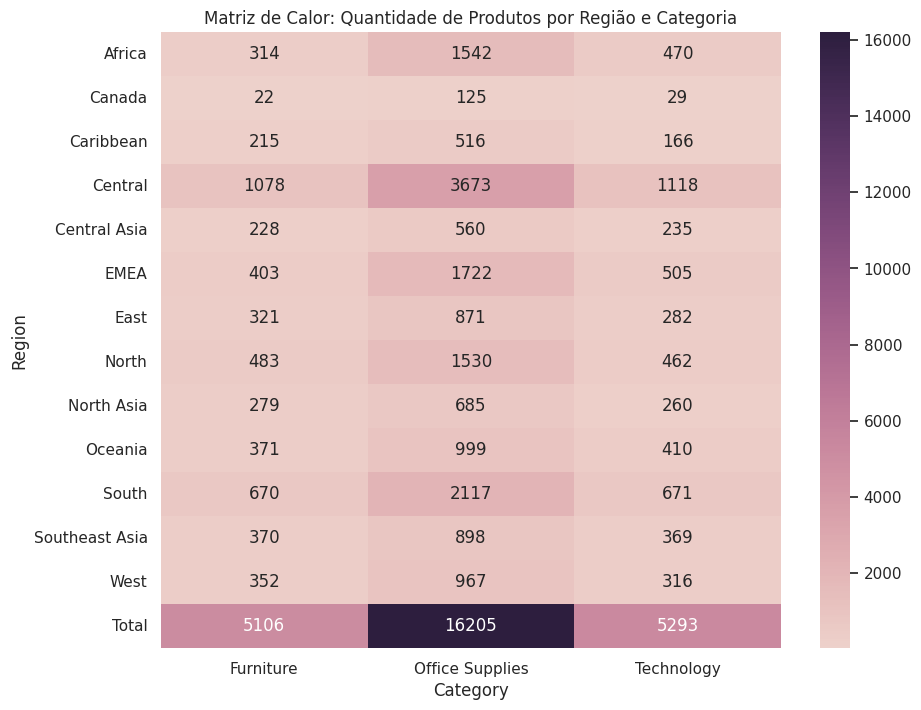

In [38]:

# Criando a matriz de calor
plt.figure(figsize=(10, 8))
sns.heatmap(quantidade_regiao[['Furniture', 'Office Supplies', 'Technology']],cmap=sns.cubehelix_palette(as_cmap=True), annot=True, fmt='g')

# Adicionando título
plt.title('Matriz de Calor: Quantidade de Produtos por Região e Categoria')

# Exibindo o gráfico
plt.show()

Notamos que o Continente que mais comprou foi Central e a que menos comprou foi o Canada. Agora faremos a análise pela Categoria com base no lucro.

In [39]:
lucro_categoria = data_work.groupby(['Category'])['Profit'].sum().reset_index()
lucro_categoria

,Category,Profit
0,Furniture,139150.86100
1,Office Supplies,269517.82680
2,Technology,343304.46584


O que deu mais lucro foi a categoria Technology seguida de Office Spupplies e por fim furniture, como a categoria que nos deu menos lucro.

### Análise em relação a vendas

In [40]:
# criando uma coluna para anos
data_work['Year'] = data_work['Order Date'].dt.year
# criando uma coluna para mes anos
data_work['Month Year'] = data_work['Order Date'].dt.strftime('%m/%Y')

In [41]:
vendas_por_ano = data_work.groupby(['Category',"Year"])['Sales'].sum().reset_index()
vendas_por_ano['Year'].dtypes

dtype('int64')

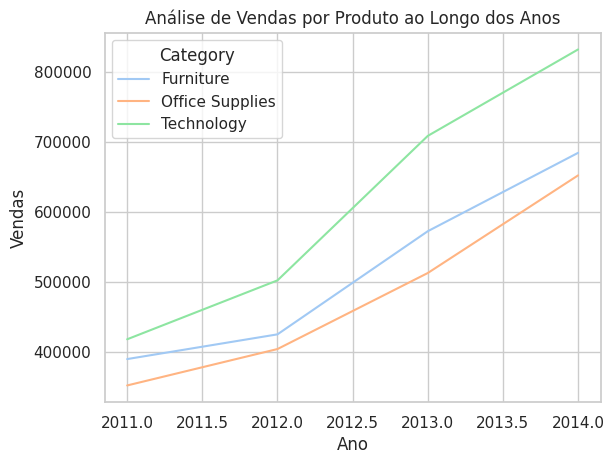

In [42]:
sns.lineplot(x='Year', y='Sales', hue='Category',palette = 'pastel', data=vendas_por_ano)
plt.title('Análise de Vendas por Produto ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Vendas')
plt.show()

Verificamos que de 2011 a 104 a Categoria Tecnologia continuou crescendo, assim como as demais.

In [43]:
vendas_por_anoreg = data_work.groupby(['Category',"Year",'Region'])['Sales'].sum().reset_index()
vendas_por_anoreg['Year'].dtypes
vendas_por_anoreg

,Category,Year,Region,Sales
0,Furniture,2011,Africa,18771.45000
1,Furniture,2011,Canada,246.48000
2,Furniture,2011,Caribbean,8552.15200
3,Furniture,2011,Central,84396.30570
4,Furniture,2011,Central Asia,17002.43100
...,...,...,...,...
151,Technology,2014,North Asia,51633.24000
152,Technology,2014,Oceania,66299.74200
153,Technology,2014,South,118161.64792
154,Technology,2014,Southeast Asia,62301.39390


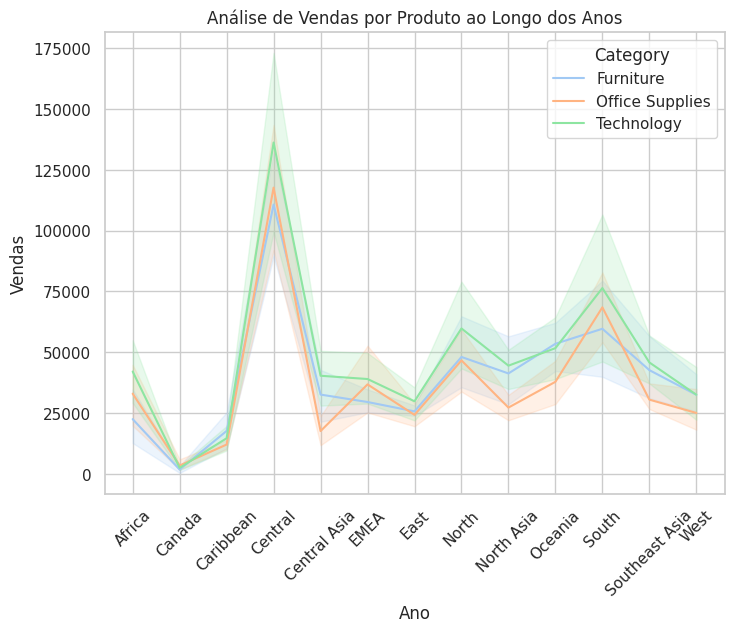

In [44]:

plt.figure(figsize=(8, 6))
sns.lineplot(x='Region', y='Sales', hue='Category',palette = 'pastel', data=vendas_por_anoreg)
plt.title('Análise de Vendas por Produto ao Longo dos Anos')
plt.xlabel('Ano')
plt.xticks(rotation = 45)
plt.ylabel('Vendas')
plt.show()

Para compreendermos melhor o gráfico farei a análise por item de categoria:

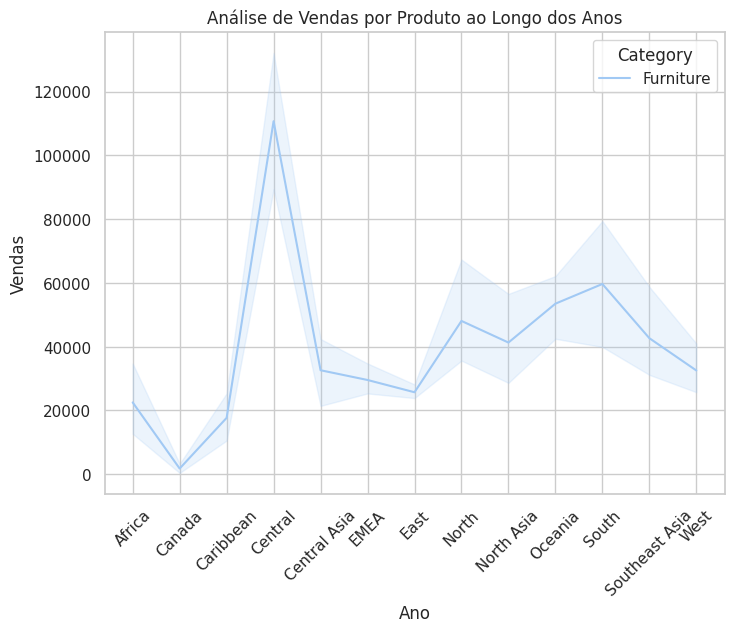

In [45]:
#vendas_por_anoreg = data_work.groupby(['Category',"Year",'Region'])['Sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.lineplot(x='Region', y='Sales', hue='Category',palette = 'pastel', data= vendas_por_anoreg[vendas_por_anoreg['Category'] == 'Furniture'])
plt.title('Análise de Vendas por Produto ao Longo dos Anos')
plt.xlabel('Ano')
plt.xticks(rotation=45)
plt.ylabel('Vendas')
plt.show()

O ponto sombreado superior representa o ponto máximo, a linha continua a média e sombreado inferior o mínimo.

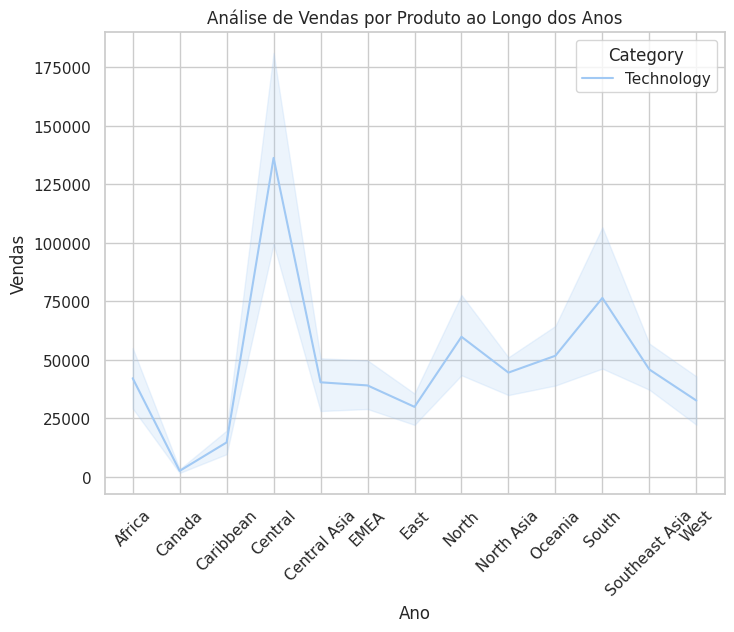

In [46]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='Region', y='Sales', hue='Category',palette = 'pastel', data= vendas_por_anoreg[vendas_por_anoreg['Category'] == 'Technology'])
plt.title('Análise de Vendas por Produto ao Longo dos Anos')
plt.xlabel('Ano')
plt.xticks(rotation=45)
plt.ylabel('Vendas')
plt.show()

### Análise em relação ao produto

In [47]:
total_sales = data_work.groupby(['Product Name']).agg({'Sales': 'sum','Quantity': 'sum'}).reset_index()

# Renomear as colunas para refletir o significado
total_sales = total_sales.rename(columns={'Product Name': 'Product Count'})
# rank
rank_sales = total_sales.sort_values(by = 'Sales', ascending = False)
rank_sales['Sales Rank'] = range(1,len(rank_sales) + 1)

rank_quantity = total_sales.sort_values(by = 'Quantity', ascending = False)
rank_quantity['Quantity Rank'] = range(1,len(rank_quantity) + 1)


In [48]:
# o rank das 10 maiores arrecadações são:
rank_sales.head(10)

,Product Count,Sales,Quantity,Sales Rank
302,"Apple Smart Phone, Full Size",42054.8526,82,1
2337,"Motorola Smart Phone, Full Size",29817.5130,56,2
2883,"Samsung Smart Phone, Cordless",26597.3100,68,3
2416,"Nokia Smart Phone, Full Size",25254.8590,55,4
2885,"Samsung Smart Phone, VoIP",25195.1040,48,5
2544,"Office Star Executive Leather Armchair, Adjust...",25181.7860,73,6
2417,"Nokia Smart Phone, with Caller ID",23733.3768,51,7
2848,"Safco Library with Doors, Pine",22752.6138,73,8
2441,"Novimex Executive Leather Armchair, Red",22316.6320,73,9
2338,"Motorola Smart Phone, with Caller ID",21561.0360,36,10


In [49]:
# o rank das 10 maiores quantidades são:
rank_quantity.head(10)

,Product Count,Sales,Quantity,Quantity Rank
3165,Staples,3720.7820,452,1
1173,"Eldon File Cart, Single Width",20603.4707,192,2
2964,"Sanford Pencil Sharpener, Water Color",3278.5459,151,3
867,"Cardinal Index Tab, Clear",879.6526,147,4
430,"Avery Index Tab, Clear",680.8967,131,5
2741,"Rogers File Cart, Single Width",13286.8806,124,6
1919,"Ibico Index Tab, Clear",897.1398,121,7
3071,"Smead File Cart, Single Width",11743.0680,119,8
56,"Acco Binder Covers, Clear",1147.8144,116,9
869,"Cardinal Index Tab, Economy",773.6540,116,10


In [50]:
# Agrupando os dados por 'Product Name' e 'country' somando 'Sales' e  'Quantity'
group_country_prod = data_work.groupby(['Country','Product Name']).agg({'Sales': 'sum','Quantity': 'sum'}).reset_index()
# rank
rank_sales = group_country_prod.sort_values(by = 'Sales', ascending = False)
rank_sales['Sales Rank'] = range(1,len(rank_sales) + 1)

rank_quantity = group_country_prod.sort_values(by = 'Quantity', ascending = False)
rank_quantity['Quantity Rank'] = range(1,len(rank_quantity) + 1)

In [51]:
# o rank das 10 maiores arrecadações são:
rank_sales.head(10)

,Country,Product Name,Sales,Quantity,Sales Rank
17786,United States,Canon imageCLASS 2200 Advanced Copier,17499.950,5,1
10021,Italy,"Hoover Stove, Red",11937.870,21,2
18331,United States,Lexmark MX611dhe Monochrome Laser Printer,11219.934,10,3
18170,United States,Hewlett Packard LaserJet 3310 Copier,11159.814,21,4
15321,Spain,"Hamilton Beach Stove, Silver",10318.710,19,5
1059,Australia,"Nokia Smart Phone, with Caller ID",9775.323,17,6
8328,India,"Motorola Smart Phone, with Caller ID",9683.100,15,7
17855,United States,Cubify CubeX 3D Printer Double Head Print,9299.969,7,8
17780,United States,Canon Imageclass D680 Copier / Fax,8959.872,16,9
18152,United States,HP Designjet T520 Inkjet Large Format Printer ...,8749.950,5,10


Agora estaremos fazendo a análise em relação ao ano e número de vendas

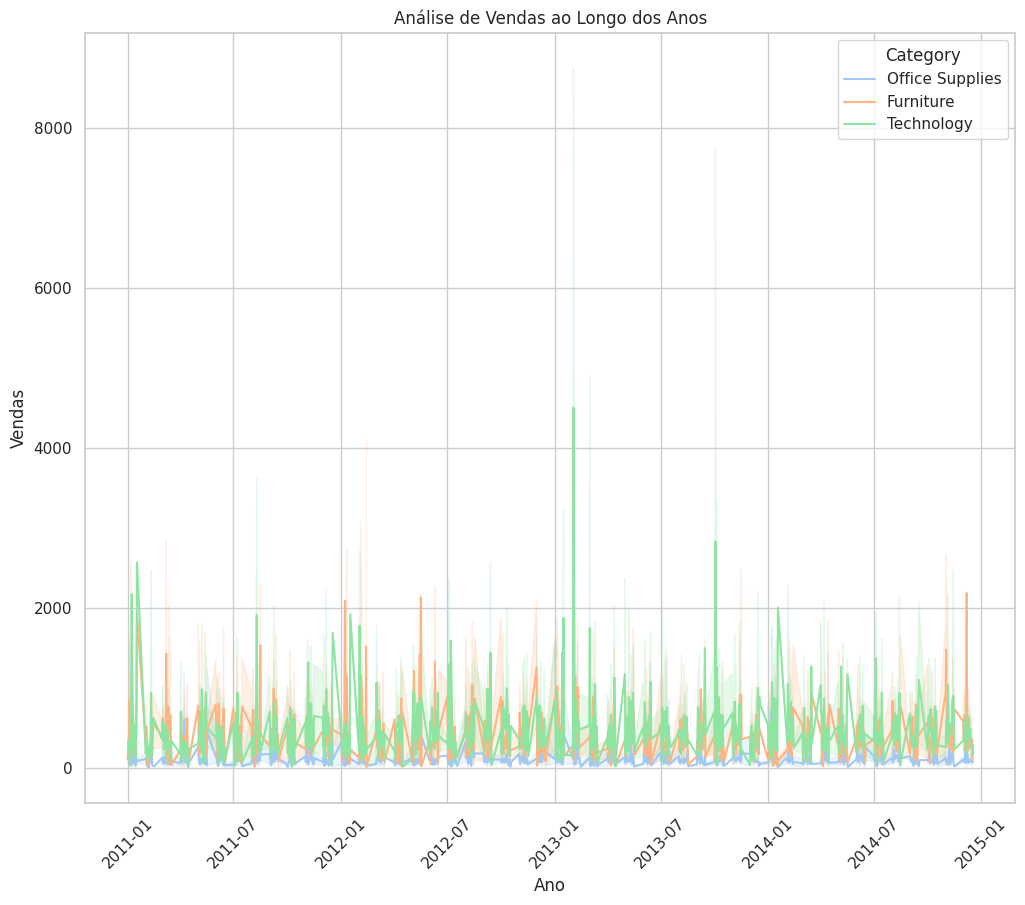

In [52]:
plt.figure(figsize=(12, 10))
sns.lineplot(x='Order Date', y='Sales', hue='Category',palette = 'pastel', data= data_work)
plt.title('Análise de Vendas ao Longo dos Anos')
plt.xlabel('Ano')
plt.xticks(rotation=45)
plt.ylabel('Vendas')
plt.show()

Verificamos a dificuldade de analisar o numero de vendas, com base nisso faremos uma análise por cada categoria.

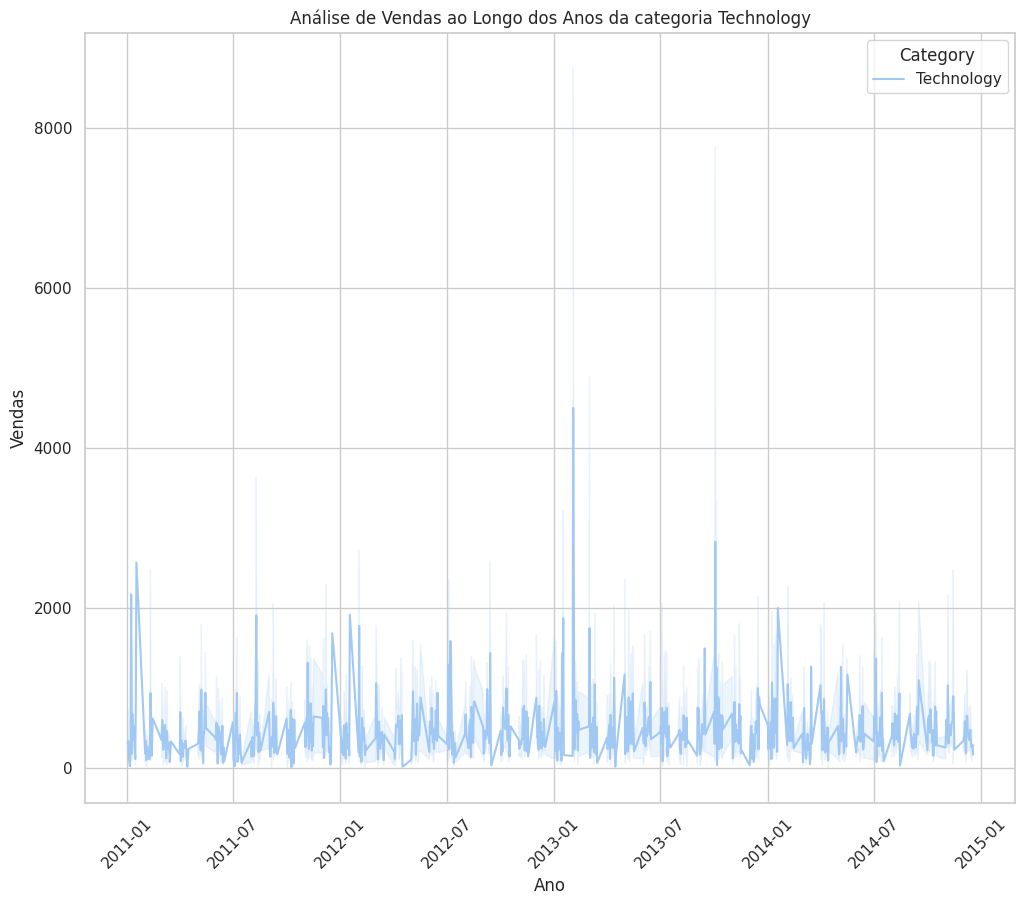

In [53]:
plt.figure(figsize=(12, 10))
sns.lineplot(x='Order Date', y='Sales', hue='Category',palette = 'pastel', data= data_work[data_work['Category']=='Technology'])
plt.title('Análise de Vendas ao Longo dos Anos da categoria Technology')
plt.xlabel('Ano')
plt.xticks(rotation=45)
plt.ylabel('Vendas')
plt.show()

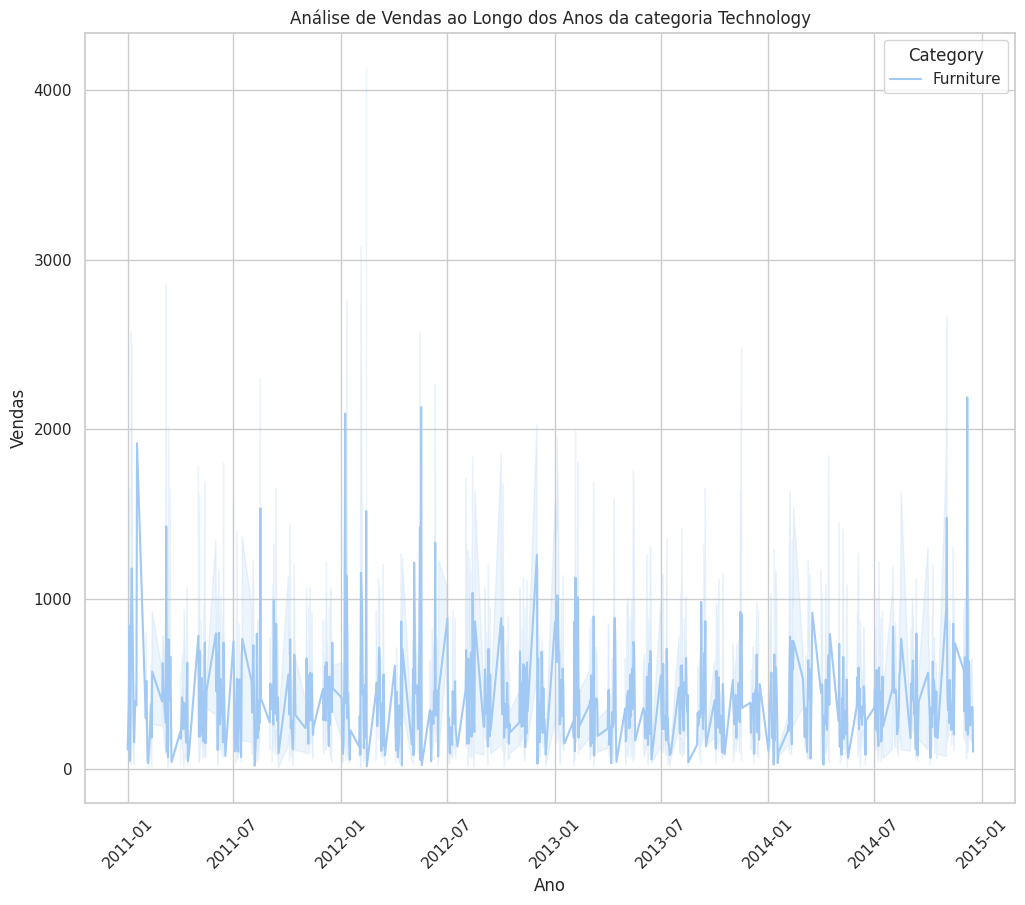

In [54]:
plt.figure(figsize=(12, 10))
sns.lineplot(x='Order Date', y='Sales', hue='Category',palette = 'pastel', data= data_work[data_work['Category']=='Furniture'])
plt.title('Análise de Vendas ao Longo dos Anos da categoria Technology')
plt.xlabel('Ano')
plt.xticks(rotation=45)
plt.ylabel('Vendas')
plt.show()

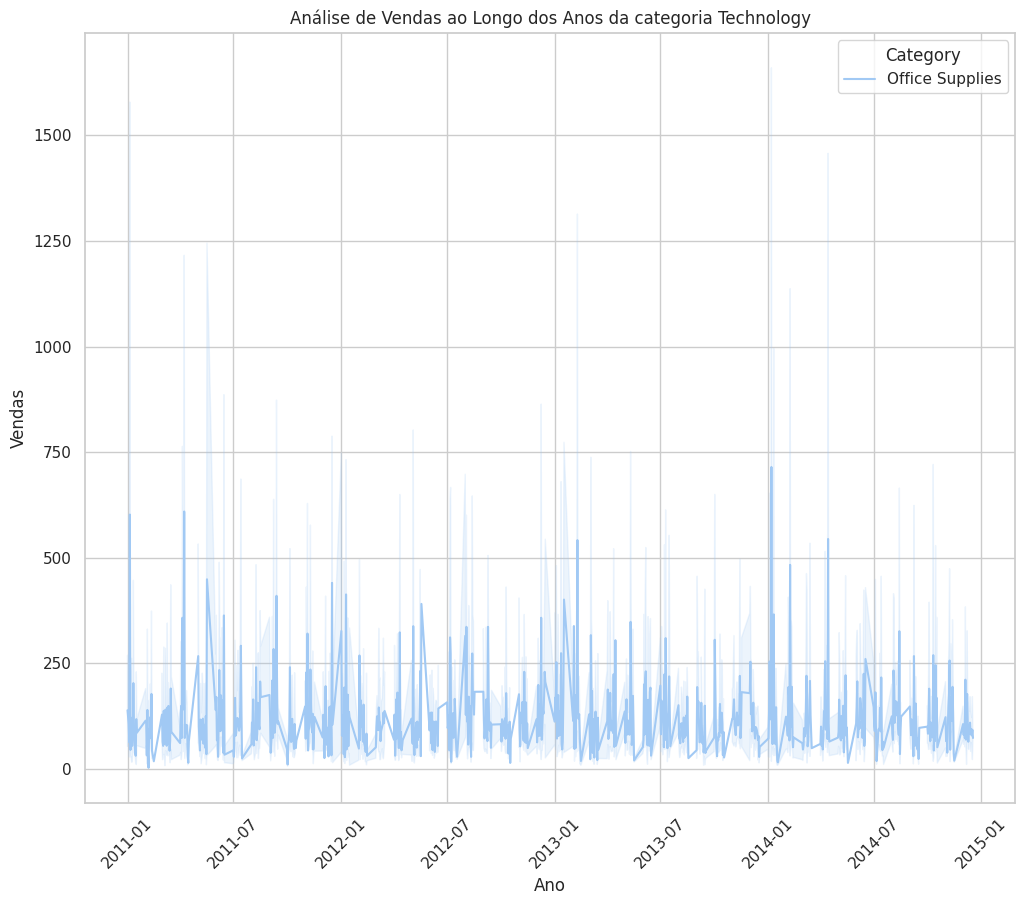

In [55]:
plt.figure(figsize=(12, 10))
sns.lineplot(x='Order Date', y='Sales', hue='Category',palette = 'pastel', data= data_work[data_work['Category']=='Office Supplies'])
plt.title('Análise de Vendas ao Longo dos Anos da categoria Technology')
plt.xlabel('Ano')
plt.xticks(rotation=45)
plt.ylabel('Vendas')
plt.show()

# Desafio

## Pré-Processamento de dados

In [56]:
# pegando as informações novamente para nosso tratamento e constrrução do modelo
data_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26604 entries, 0 to 51289
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          26604 non-null  int64         
 1   Order ID        26604 non-null  object        
 2   Order Date      26604 non-null  datetime64[ns]
 3   Ship Date       26604 non-null  datetime64[ns]
 4   Ship Mode       26604 non-null  object        
 5   Customer ID     26604 non-null  object        
 6   Customer Name   26604 non-null  object        
 7   Segment         26604 non-null  object        
 8   City            26604 non-null  object        
 9   State           26604 non-null  object        
 10  Country         26604 non-null  object        
 11  Market          26604 non-null  object        
 12  Region          26604 non-null  object        
 13  Product ID      26604 non-null  object        
 14  Category        26604 non-null  object        
 15  Su

In [57]:
# verificando novamente nossa dimensionalidade
data_work.shape

(26604, 28)

In [58]:
# verificando se há dados discrepantes
data_work.describe(include = 'all')

<ipython-input-58-9d350094021e>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_work.describe(include = 'all')
<ipython-input-58-9d350094021e>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_work.describe(include = 'all')


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit price,Delivery speed,Delivery Day,Year,Month Year
count,26604.000000,26604,26604,26604,26604,26604,26604,26604,26604,26604,26604,26604,26604,26604,26604,26604,26604,26604.000000,26604.000000,26604.000000,26604.000000,26604.000000,26604,26604.000000,26604,26604.000000,26604.000000,26604
unique,NaN,13326,793,804,4,1555,795,3,2962,985,143,7,13,9078,3,17,3638,NaN,NaN,NaN,NaN,NaN,4,NaN,3,NaN,NaN,48
top,NaN,MX-2014-166541,2014-11-12 00:00:00,2014-12-02 00:00:00,Standard Class,WB-21850,William Brown,Consumer,New York City,California,United States,APAC,Central,OFF-AR-10003651,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN,NaN,Medium,NaN,slow,NaN,NaN,12/2014
freq,NaN,13,172,177,17074,57,62,13797,492,1032,5202,5664,5869,18,16205,3137,122,NaN,NaN,NaN,NaN,NaN,15721,NaN,13307,NaN,NaN,1214
first,NaN,NaN,2011-01-01 00:00:00,2011-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2014-12-18 00:00:00,2015-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,25603.119155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242.679502,3.476620,0.141896,28.265417,25.249611,NaN,70.984754,NaN,11.790783,2012.776951,NaN
std,14767.414859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,461.804852,2.278791,0.211464,169.297269,54.494576,NaN,109.437736,NaN,8.305091,1.101277,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.556000,1.000000,0.000000,-6599.978000,0.010000,NaN,0.336000,NaN,0.000000,2011.000000,NaN
25%,12813.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.960000,2.000000,0.000000,0.000000,2.610000,NaN,11.880000,NaN,4.000000,2012.000000,NaN


In [59]:
data_work.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Unit price', 'Delivery speed',
       'Delivery Day', 'Year', 'Month Year'],
      dtype='object')

In [60]:
data_work['Month Year'] = pd.to_datetime(data_work['Month Year'], format='%m/%Y').dt.strftime('%Y%m').astype(int)
data_work['Day Month Year'] = pd.to_datetime(data_work['Order Date'], format='%d/%m/%Y').dt.strftime('%Y%m%d').astype(int)

In [61]:
furniture = data_work.loc[data_work['Category'] == 'Furniture']
technology = data_work.loc[data_work['Category'] == 'Technology']
office_supplies = data_work.loc[data_work['Category'] == 'Office Supplies']

Verificamos que em nosso conjunto de dados ship mode possui, 4 dados únicos, segmento, 3, category, 3, order priority, 4, delivery speed ,3, essas colunas sefrerão um one hot encoder para que possamos prever nossas vendas(sales).

One hot encoder faz com que variáveis categóricas do tipo delivery speed que possui 3 opções, seja criada novas colunas atribuindo 1 ou 0 para cada uma.

In [62]:
furniture.shape

(5106, 29)

In [63]:
technology.shape

(5293, 29)

In [64]:
office_supplies.shape

(16205, 29)

In [65]:
# importando onehotencoder
from sklearn.preprocessing import OneHotEncoder

In [66]:
# criando objeto ohe
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform = 'pandas')

# criando objeto para fit_transform
furniture_transform = ohe.fit_transform(furniture[['Segment','Region', 'Ship Mode','Market','Order Priority','Delivery speed']])
technology_transform = ohe.fit_transform(technology[['Segment','Region', 'Ship Mode','Market','Order Priority','Delivery speed']])
office_supplies_transform = ohe.fit_transform(office_supplies[['Segment','Region', 'Ship Mode','Market','Order Priority','Delivery speed']])

In [67]:
# concatenando data com o ohetransform
data_furn_concat = pd.concat([furniture,furniture_transform], axis = 1)
data_tec_concat = pd.concat([technology,technology_transform], axis = 1)
data_office_concat = pd.concat([office_supplies,office_supplies_transform], axis = 1)

In [68]:
data_furn_concat.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Unit price', 'Delivery speed',
       'Delivery Day', 'Year', 'Month Year', 'Day Month Year',
       'Segment_Consumer', 'Segment_Corporate', 'Segment_Home Office',
       'Region_Africa', 'Region_Canada', 'Region_Caribbean', 'Region_Central',
       'Region_Central Asia', 'Region_EMEA', 'Region_East', 'Region_North',
       'Region_North Asia', 'Region_Oceania', 'Region_South',
       'Region_Southeast Asia', 'Region_West', 'Ship Mode_First Class',
       'Ship Mode_Same Day', 'Ship Mode_Second Class',
       'Ship Mode_Standard Class', 'Market_APAC', 'Market_Africa',
       'Market_Canada', 'Market_EMEA', 'Market_EU', 'Market_LATAM',
       'Market_US', 'Order Prio

In [69]:
data_tec_concat.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Unit price', 'Delivery speed',
       'Delivery Day', 'Year', 'Month Year', 'Day Month Year',
       'Segment_Consumer', 'Segment_Corporate', 'Segment_Home Office',
       'Region_Africa', 'Region_Canada', 'Region_Caribbean', 'Region_Central',
       'Region_Central Asia', 'Region_EMEA', 'Region_East', 'Region_North',
       'Region_North Asia', 'Region_Oceania', 'Region_South',
       'Region_Southeast Asia', 'Region_West', 'Ship Mode_First Class',
       'Ship Mode_Same Day', 'Ship Mode_Second Class',
       'Ship Mode_Standard Class', 'Market_APAC', 'Market_Africa',
       'Market_Canada', 'Market_EMEA', 'Market_EU', 'Market_LATAM',
       'Market_US', 'Order Prio

In [70]:
data_office_concat.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Unit price', 'Delivery speed',
       'Delivery Day', 'Year', 'Month Year', 'Day Month Year',
       'Segment_Consumer', 'Segment_Corporate', 'Segment_Home Office',
       'Region_Africa', 'Region_Canada', 'Region_Caribbean', 'Region_Central',
       'Region_Central Asia', 'Region_EMEA', 'Region_East', 'Region_North',
       'Region_North Asia', 'Region_Oceania', 'Region_South',
       'Region_Southeast Asia', 'Region_West', 'Ship Mode_First Class',
       'Ship Mode_Same Day', 'Ship Mode_Second Class',
       'Ship Mode_Standard Class', 'Market_APAC', 'Market_Africa',
       'Market_Canada', 'Market_EMEA', 'Market_EU', 'Market_LATAM',
       'Market_US', 'Order Prio

In [71]:
data_furniture = data_furn_concat.groupby([
                                          'Order Date','Day Month Year', 'Quantity', 'Discount', 'Profit',
                                          'Shipping Cost', 'Order Priority', 'Unit price', 'Delivery speed',
                                          'Delivery Day', 'Year', 'Month Year', 'Segment_Consumer',
                                          'Segment_Corporate', 'Segment_Home Office', 'Region_Africa',
                                          'Region_Canada', 'Region_Caribbean', 'Region_Central',
                                          'Region_Central Asia', 'Region_EMEA', 'Region_East', 'Region_North',
                                          'Region_North Asia', 'Region_Oceania', 'Region_South',
                                          'Region_Southeast Asia', 'Region_West', 'Ship Mode_First Class',
                                          'Ship Mode_Same Day', 'Ship Mode_Second Class',
                                          'Ship Mode_Standard Class', 'Market_APAC', 'Market_Africa',
                                          'Market_Canada', 'Market_EMEA', 'Market_EU', 'Market_LATAM',
                                          'Market_US', 'Order Priority_Critical', 'Order Priority_High',
                                          'Order Priority_Low', 'Order Priority_Medium', 'Delivery speed_fast',
                                          'Delivery speed_normal','Delivery speed_slow'])['Sales'].sum().reset_index()
data_furniture = data_furniture.set_index('Order Date')

data_tec = data_tec_concat.groupby([
                                    'Order Date','Day Month Year', 'Quantity', 'Discount', 'Profit',
                                     'Shipping Cost', 'Order Priority', 'Unit price', 'Delivery speed',
                                     'Delivery Day', 'Year', 'Month Year', 'Segment_Consumer',
                                     'Segment_Corporate', 'Segment_Home Office', 'Region_Africa',
                                     'Region_Canada', 'Region_Caribbean', 'Region_Central',
                                     'Region_Central Asia', 'Region_EMEA', 'Region_East', 'Region_North',
                                     'Region_North Asia', 'Region_Oceania', 'Region_South',
                                     'Region_Southeast Asia', 'Region_West', 'Ship Mode_First Class',
                                     'Ship Mode_Same Day', 'Ship Mode_Second Class',
                                     'Ship Mode_Standard Class', 'Market_APAC', 'Market_Africa',
                                     'Market_Canada', 'Market_EMEA', 'Market_EU', 'Market_LATAM',
                                     'Market_US', 'Order Priority_Critical', 'Order Priority_High',
                                     'Order Priority_Low', 'Order Priority_Medium', 'Delivery speed_fast',
                                     'Delivery speed_normal', 'Delivery speed_slow'])['Sales'].sum().reset_index()
data_tec = data_tec.set_index('Order Date')

data_office = data_office_concat.groupby([
                                          'Order Date','Day Month Year', 'Quantity', 'Discount', 'Profit',
                                          'Shipping Cost', 'Order Priority', 'Unit price', 'Delivery speed',
                                          'Delivery Day', 'Year', 'Month Year', 'Segment_Consumer',
                                          'Segment_Corporate', 'Segment_Home Office', 'Region_Africa',
                                          'Region_Canada', 'Region_Caribbean', 'Region_Central',
                                          'Region_Central Asia', 'Region_EMEA', 'Region_East', 'Region_North',
                                          'Region_North Asia', 'Region_Oceania', 'Region_South',
                                          'Region_Southeast Asia', 'Region_West', 'Ship Mode_First Class',
                                          'Ship Mode_Same Day', 'Ship Mode_Second Class',
                                          'Ship Mode_Standard Class', 'Market_APAC', 'Market_Africa',
                                          'Market_Canada', 'Market_EMEA', 'Market_EU', 'Market_LATAM',
                                          'Market_US', 'Order Priority_Critical', 'Order Priority_High',
                                          'Order Priority_Low', 'Order Priority_Medium', 'Delivery speed_fast',
                                          'Delivery speed_normal', 'Delivery speed_slow'])['Sales'].sum().reset_index()
data_office = data_office.set_index('Order Date')

<Axes: xlabel='Order Date'>

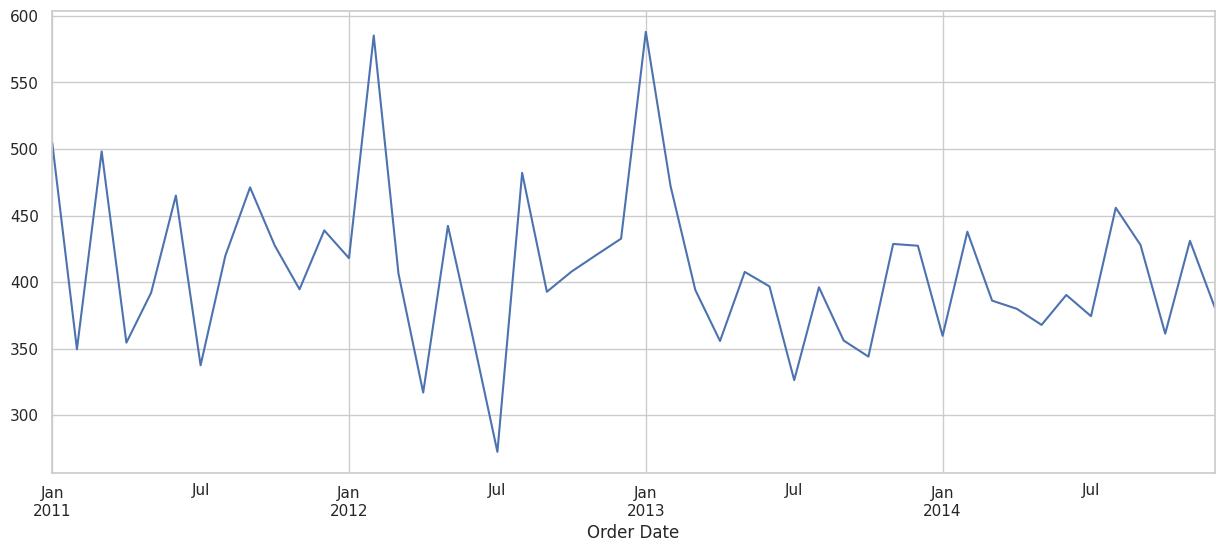

In [72]:
f = data_furniture.groupby(['Order Date', 'Quantity', 'Discount', 'Profit',
                           'Shipping Cost', 'Unit price', 'Order Priority_Critical', 'Order Priority_High',
                           'Order Priority_Low', 'Order Priority_Medium', 'Delivery speed_fast',
                           'Delivery speed_normal', 'Delivery speed_slow'])['Sales'].sum().reset_index()
f = f.set_index('Order Date')
#furniture = furniture.apply(lambda x: x.set_index('Order Date'))
f.index
y = f['Sales'].resample('MS').mean()
y.plot(figsize=(15, 6))


In [73]:
# importando bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [74]:
x_furn = data_furniture[['Day Month Year', 'Quantity', 'Discount', 'Profit',
                         'Shipping Cost', 'Unit price', 'Segment_Consumer',
                         'Segment_Corporate', 'Segment_Home Office', 'Region_Africa',
                         'Region_Canada', 'Region_Caribbean', 'Region_Central',
                         'Region_Central Asia', 'Region_EMEA', 'Region_East', 'Region_North',
                         'Region_North Asia', 'Region_Oceania', 'Region_South',
                         'Region_Southeast Asia', 'Region_West', 'Ship Mode_First Class',
                         'Ship Mode_Same Day', 'Ship Mode_Second Class',
                         'Ship Mode_Standard Class', 'Market_APAC', 'Market_Africa',
                         'Market_Canada', 'Market_EMEA', 'Market_EU', 'Market_LATAM',
                         'Market_US', 'Order Priority_Critical', 'Order Priority_High',
                         'Order Priority_Low', 'Order Priority_Medium', 'Delivery speed_fast',
                         'Delivery speed_normal', 'Delivery speed_slow']]
y_furn = data_furniture['Sales']

x_tec = data_tec[['Day Month Year', 'Quantity', 'Discount', 'Profit',
                         'Shipping Cost', 'Unit price', 'Segment_Consumer',
                         'Segment_Corporate', 'Segment_Home Office', 'Region_Africa',
                         'Region_Canada', 'Region_Caribbean', 'Region_Central',
                         'Region_Central Asia', 'Region_EMEA', 'Region_East', 'Region_North',
                         'Region_North Asia', 'Region_Oceania', 'Region_South',
                         'Region_Southeast Asia', 'Region_West', 'Ship Mode_First Class',
                         'Ship Mode_Same Day', 'Ship Mode_Second Class',
                         'Ship Mode_Standard Class', 'Market_APAC', 'Market_Africa',
                         'Market_Canada', 'Market_EMEA', 'Market_EU', 'Market_LATAM',
                         'Market_US', 'Order Priority_Critical', 'Order Priority_High',
                         'Order Priority_Low', 'Order Priority_Medium', 'Delivery speed_fast',
                         'Delivery speed_normal', 'Delivery speed_slow']]
y_tec = data_tec['Sales']

x_office = data_office[['Day Month Year', 'Quantity', 'Discount', 'Profit',
                         'Shipping Cost', 'Unit price', 'Segment_Consumer',
                         'Segment_Corporate', 'Segment_Home Office', 'Region_Africa',
                         'Region_Canada', 'Region_Caribbean', 'Region_Central',
                         'Region_Central Asia', 'Region_EMEA', 'Region_East', 'Region_North',
                         'Region_North Asia', 'Region_Oceania', 'Region_South',
                         'Region_Southeast Asia', 'Region_West', 'Ship Mode_First Class',
                         'Ship Mode_Same Day', 'Ship Mode_Second Class',
                         'Ship Mode_Standard Class', 'Market_APAC', 'Market_Africa',
                         'Market_Canada', 'Market_EMEA', 'Market_EU', 'Market_LATAM',
                         'Market_US', 'Order Priority_Critical', 'Order Priority_High',
                         'Order Priority_Low', 'Order Priority_Medium', 'Delivery speed_fast',
                         'Delivery speed_normal', 'Delivery speed_slow']]
y_office = data_office['Sales']

In [75]:
# separando treino e teste sem normalização
x_train_furn, x_test_furn, y_train_furn, y_test_furn = train_test_split(x_furn, y_furn, test_size=0.3, random_state = 0)
x_train_tec, x_test_tec, y_train_tec, y_test_tec = train_test_split(x_tec, y_tec, test_size=0.3, random_state = 0)
x_train_office, x_test_office, y_train_office, y_test_office = train_test_split(x_office, y_office, test_size=0.3, random_state = 0)
# treinando o modelo

### Modelos

In [76]:
modelo_furniture = XGBRegressor()
modelo_tec = XGBRegressor()
modelo_office = XGBRegressor()

In [78]:
previsao_furn = modelo_furniture.fit(x_train_furn, y_train_furn)
previsao_tec = modelo_tec.fit(x_train_tec, y_train_tec)
previsao_office = modelo_office.fit(x_train_office, y_train_office)

In [79]:
# testando o modelo
y_predict_furn = modelo_furniture.predict(x_test_furn)
y_predict_tec = modelo_tec.predict(x_test_tec)
y_predict_office = modelo_office.predict(x_test_office)

In [80]:
# analisando as métricas furn
mse_furn = mean_squared_error(y_test_furn, y_predict_furn)
mae_furn = mean_absolute_error(y_test_furn, y_predict_furn)
r2_furn = r2_score(y_test_furn, y_predict_furn)

# analisando as métricas tec
mse_tec = mean_squared_error(y_test_tec, y_predict_tec)
mae_tec = mean_absolute_error(y_test_tec, y_predict_tec)
r2_tec = r2_score(y_test_tec, y_predict_tec)

# analisando as métricas office
mse_office = mean_squared_error(y_test_office, y_predict_office)
mae_office = mean_absolute_error(y_test_office, y_predict_office)
r2_office = r2_score(y_test_office, y_predict_office)

In [81]:
# o valor delas são
print("O MSE é: ", mse_furn ,'\n',
      "O MAE é: ", mae_furn,'\n',
      'O r2 é: ', r2_furn)

O MSE é:  20902.398543320658 
 O MAE é:  36.30097297337908 
 O r2 é:  0.9378308222880111


In [82]:
# o valor delas são
print("O MSE é: ", mse_tec ,'\n',
      "O MAE é: ", mae_tec,'\n',
      'O r2 é: ', r2_tec)

O MSE é:  95468.70877527917 
 O MAE é:  40.791058487104564 
 O r2 é:  0.805301649686037


In [83]:
# o valor delas são
print("O MSE é: ", mse_office ,'\n',
      "O MAE é: ", mae_office,'\n',
      'O r2 é: ', r2_office)

O MSE é:  2253.0591817816894 
 O MAE é:  7.357763926905713 
 O r2 é:  0.9709726275757052


In [93]:
y_predict_office.shape

(4862,)

In [94]:
furniture_pred = pd.DataFrame({'Day Month Year': x_train_furn['Day Month Year'].iloc[:1532], 'Sales_Real': y_train_furn[:1532], 'Sales_Predicted': y_predict_furn})
tec_pred = pd.DataFrame({'Day Month Year': x_train_tec['Day Month Year'].iloc[:1588], 'Sales_Real': y_train_tec[:1588], 'Sales_Predicted': y_predict_tec})
office_pred = pd.DataFrame({'Day Month Year': x_train_office['Day Month Year'].iloc[:4862], 'Sales_Real': y_train_office[:4862], 'Sales_Predicted': y_predict_office})

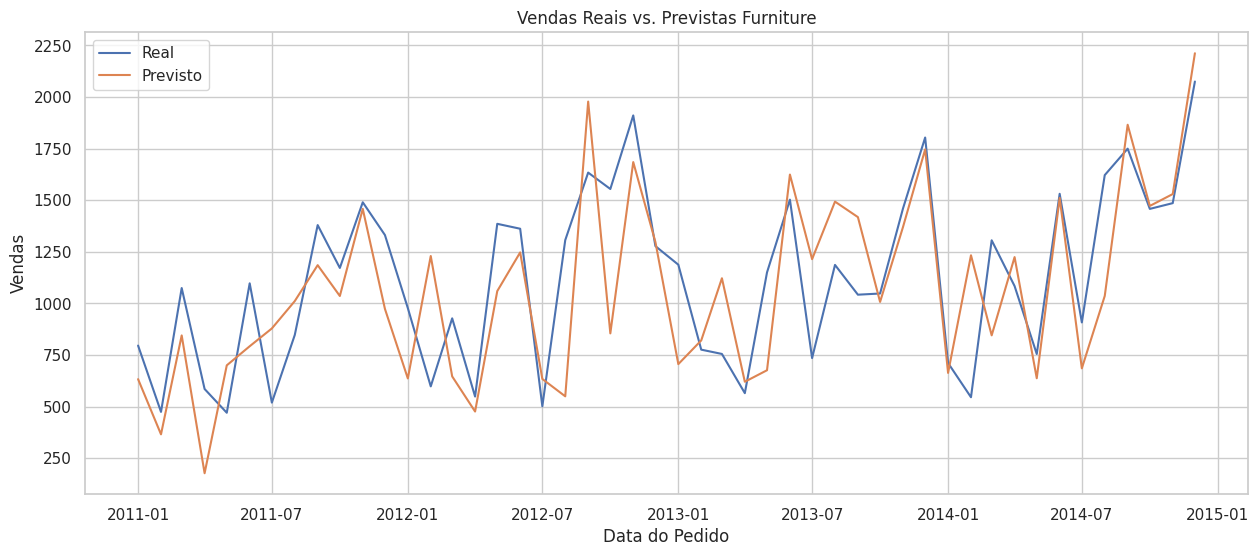

In [97]:
y_real_furn = furniture_pred.groupby(['Order Date'])['Sales_Real'].sum().resample('MS').mean()
y_predict_furn = furniture_pred.groupby(['Order Date'])['Sales_Predicted'].sum().resample('MS').mean()

plt.figure(figsize=(15, 6))

sns.lineplot(x = y_real_furn.index, y = y_real_furn.values, label = 'Real')
sns.lineplot(x = y_predict_furn.index, y = y_predict_furn.values, label = 'Previsto')

plt.title('Vendas Reais vs. Previstas Furniture')
plt.xlabel('Data do Pedido')
plt.ylabel('Vendas')
plt.legend()
plt.show()

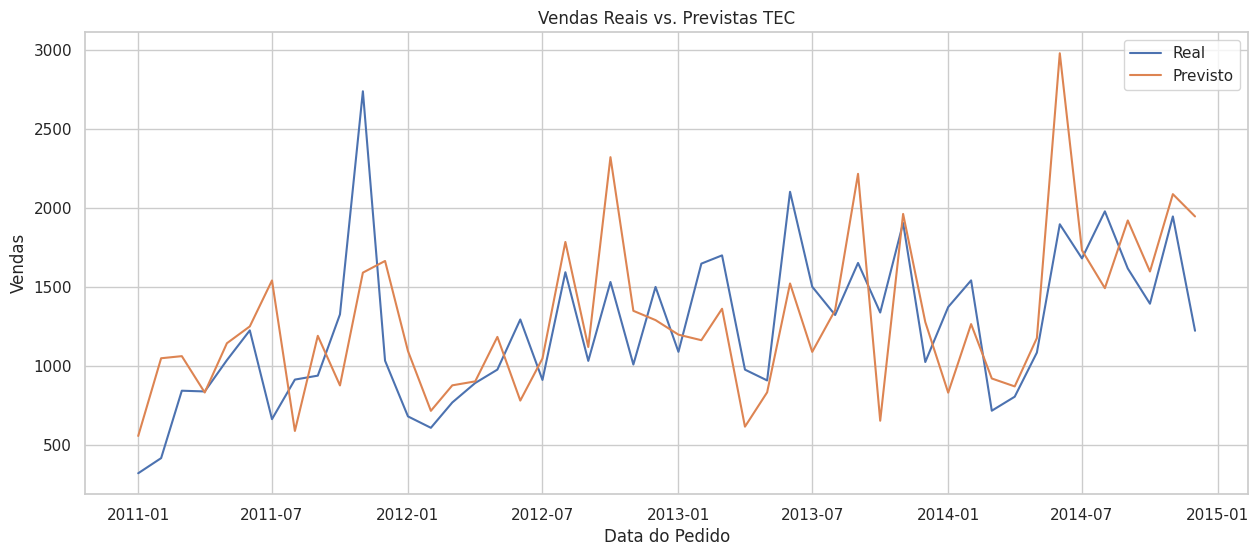

In [98]:
y_real_tec = tec_pred.groupby(['Order Date'])['Sales_Real'].sum().resample('MS').mean()
y_predict_tec = tec_pred.groupby(['Order Date'])['Sales_Predicted'].sum().resample('MS').mean()

plt.figure(figsize=(15, 6))

sns.lineplot(x = y_real_tec.index, y = y_real_tec.values, label = 'Real')
sns.lineplot(x = y_predict_tec.index, y = y_predict_tec.values, label = 'Previsto')

plt.title('Vendas Reais vs. Previstas TEC')
plt.xlabel('Data do Pedido')
plt.ylabel('Vendas')
plt.legend()
plt.show()

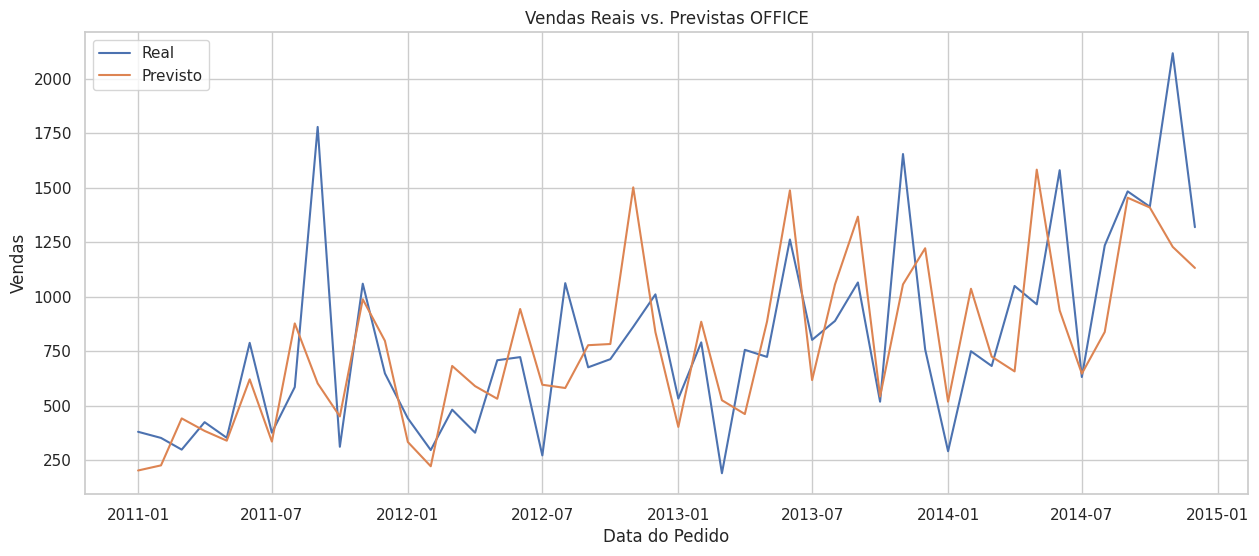

In [99]:
y_real_office = office_pred.groupby(['Order Date'])['Sales_Real'].sum().resample('MS').mean()
y_predict_office = office_pred.groupby(['Order Date'])['Sales_Predicted'].sum().resample('MS').mean()

plt.figure(figsize=(15, 6))

sns.lineplot(x = y_real_office.index, y = y_real_office.values, label = 'Real')
sns.lineplot(x = y_predict_office.index, y = y_predict_office.values, label = 'Previsto')

plt.title('Vendas Reais vs. Previstas OFFICE')
plt.xlabel('Data do Pedido')
plt.ylabel('Vendas')
plt.legend()
plt.show()

Agora iremos salvar nosso modelo.

In [100]:
import pickle

In [109]:
#modelo furn
with open('modelo_furniture.pkl', 'wb') as arquivo_1:
  pickle.dump(modelo_furniture, arquivo_1)
#modelo tec
with open('modelo_tec.pkl', 'wb') as arquivo_2:
  pickle.dump(modelo_tec, arquivo_2)
#modelo office
with open('modelo_office.pkl', 'wb') as arquivo_2:
  pickle.dump(modelo_office, arquivo_2)
